In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, SeparableConv2D

In [3]:
data=pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:

labels=data.label.to_numpy()
labels=keras.utils.to_categorical(labels,num_classes=10)
images=data[[col for col in data.columns if col!="label"]]

In [5]:
def preprocess_data(d):
    '''
    takes as input a batch of images in a forme of a DataFrame with 28*28 columns
    and preprocess it to return a tensor of shape (batch_size, 28,28,1) 
    '''
    as_array=d.to_numpy(copy=True)
    train_images=np.zeros((d.shape[0],28,28), dtype='float32')
    for i in range(train_images.shape[0]):
        temp=np.reshape(as_array[i],(28,28))
        train_images[i]=temp
    train_images=train_images[:]/255 # Normalizing
    train_images=np.reshape(train_images,(d.shape[0],28,28,1))
    return train_images
train_images=preprocess_data(images)
print(train_images.shape)

(42000, 28, 28, 1)


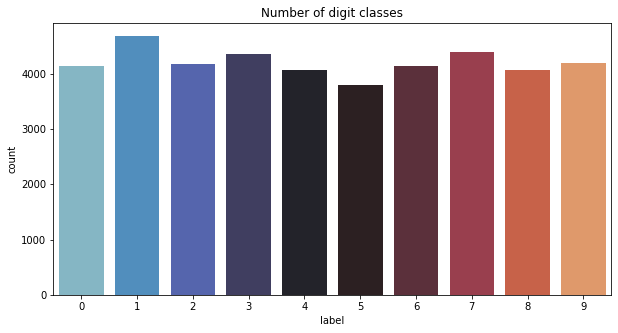

In [15]:
# Let's visualize our data
plt.figure(figsize=(10,5))
g = sns.countplot(data.label, palette="icefire")
plt.title("Number of digit classes")
plt.savefig("Number of digit classes")

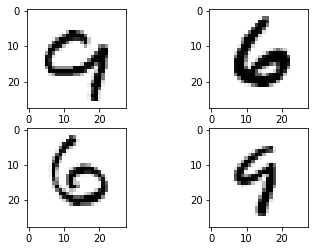

In [14]:
fig, ax =plt.subplots(2,2)
for a in ax:
    for b in a:
        image=train_images[np.random.randint(0,len(train_images))]
        b.imshow(image.reshape((28,28)),cmap='Greys')

In [8]:
# Create first model using Conv2D

model1=keras.models.Sequential()#model1 using Conv2D
model1.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D((3,3)))
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D((3,3), padding='same'))
model1.add(Flatten())
model1.add(Dense(64))
model1.add(Dense(10,activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [9]:
# Create first model using SeparableConv2D
model2=keras.models.Sequential()#model2 using SeparableConv2D
model2.add(SeparableConv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model2.add(SeparableConv2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D((3,3)))
model2.add(SeparableConv2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D((3,3), padding='same'))
model2.add(Flatten())
model2.add(Dense(64))
model2.add(Dense(10,activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 26, 26, 32)        73        
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 24, 24, 64)        2400      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 6, 6, 64)          4736      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [10]:
model1.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=['accuracy'])
history1=model1.fit(train_images,labels,epochs=13,batch_size=64,validation_split = 0.2)

Epoch 1/13
525/525 [==============================] - 26s 50ms/step - loss: 0.2334 - accuracy: 0.9267 - val_loss: 0.0700 - val_accuracy: 0.9789
Epoch 2/13
525/525 [==============================] - 31s 58ms/step - loss: 0.0540 - accuracy: 0.9827 - val_loss: 0.0487 - val_accuracy: 0.9839
Epoch 3/13
525/525 [==============================] - 29s 55ms/step - loss: 0.0366 - accuracy: 0.9884 - val_loss: 0.0406 - val_accuracy: 0.9893
Epoch 4/13
525/525 [==============================] - 30s 57ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0420 - val_accuracy: 0.9880
Epoch 5/13
525/525 [==============================] - 28s 53ms/step - loss: 0.0228 - accuracy: 0.9925 - val_loss: 0.0392 - val_accuracy: 0.9904
Epoch 6/13
525/525 [==============================] - 27s 51ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0443 - val_accuracy: 0.9901
Epoch 7/13
525/525 [==============================] - 28s 53ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0421 - val_accuracy:

In [11]:
model2.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=['accuracy'])
history2=model2.fit(train_images,labels,epochs=7,batch_size=64,validation_split = 0.2)

Epoch 1/7
525/525 [==============================] - 18s 35ms/step - loss: 0.5419 - accuracy: 0.8361 - val_loss: 0.1741 - val_accuracy: 0.9455
Epoch 2/7
525/525 [==============================] - 17s 32ms/step - loss: 0.1521 - accuracy: 0.9521 - val_loss: 0.1123 - val_accuracy: 0.9631
Epoch 3/7
525/525 [==============================] - 18s 35ms/step - loss: 0.1033 - accuracy: 0.9682 - val_loss: 0.0839 - val_accuracy: 0.9738
Epoch 4/7
525/525 [==============================] - 19s 35ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.0861 - val_accuracy: 0.9739
Epoch 5/7
525/525 [==============================] - 18s 34ms/step - loss: 0.0656 - accuracy: 0.9793 - val_loss: 0.0665 - val_accuracy: 0.9792
Epoch 6/7
525/525 [==============================] - 18s 34ms/step - loss: 0.0559 - accuracy: 0.9824 - val_loss: 0.0635 - val_accuracy: 0.9794
Epoch 7/7
525/525 [==============================] - 18s 35ms/step - loss: 0.0480 - accuracy: 0.9843 - val_loss: 0.0525 - val_accuracy: 0.9837

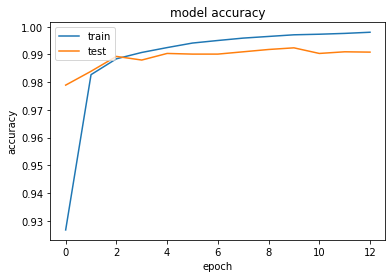

In [12]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

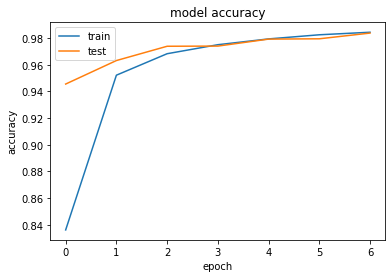

In [13]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()